In [38]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [39]:
#transform = transforms.ToTensor()

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5), (0.5))
])

mnist_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

data_loader = torch.utils.data.DataLoader(dataset=mnist_data,
                                          batch_size=64,
                                          shuffle=True)



In [40]:
dataiter = iter(data_loader)
images, labels = next(dataiter)
print(torch.min(images), torch.max(images))

tensor(-1.) tensor(1.)


In [ ]:
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()        # N, 784 (28 * 28 pixels)
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128), # N,784 -> N,128
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64,12),
            nn.ReLU(),
            nn.Linear(12,3), # N,3
        )
        self.decoder = nn.Sequential(
            nn.Linear (3, 12), 
            nn.ReLU(),
            nn.Linear(12,64),
            nn.ReLU(),
            nn.Linear(64,128),
            nn.ReLU(),
            nn.Linear(128,28*28), # N,3 -> n,784
            nn.Tanh()
        )
    def forward(self, x):
        encoded = self.encoder(x)
        deocded = self.decoder(encoded)
        return deocded
    
    

In [42]:
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)

In [43]:
num_epochs = 10
outputs = []

for epoch in range(num_epochs):
    for (img,_) in data_loader:
        img = img.reshape(-1,28*28)
        recon = model(img)
        loss = criterion(recon, img)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f'epoch:{epoch+1}, loss:{loss.item():.4f}')
    outputs.append((epoch, img, recon))

epoch:1, loss:0.1686
epoch:2, loss:0.1474
epoch:3, loss:0.1477
epoch:4, loss:0.1463
epoch:5, loss:0.1537
epoch:6, loss:0.1473
epoch:7, loss:0.1463
epoch:8, loss:0.1203
epoch:9, loss:0.1391
epoch:10, loss:0.1359


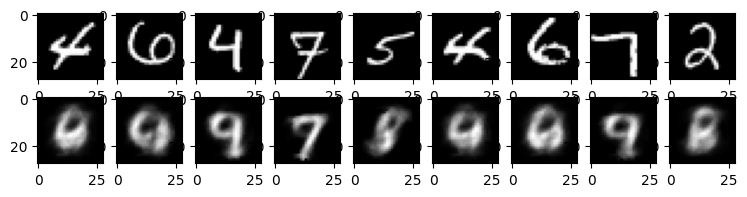

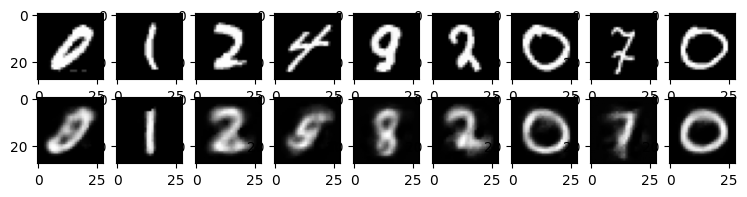

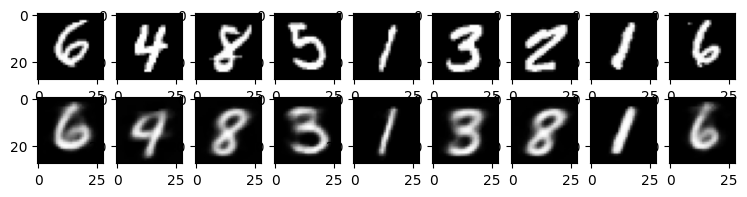

In [45]:
for k in range(0,num_epochs,4):
    plt.figure(figsize=(9,2))
    plt.gray()
    imgs = outputs[k][1].detach().numpy()
    recon = outputs[k][2].detach().numpy()

    for i, item in enumerate(imgs):
        if i >= 9: break
        plt.subplot(2,9,i+1)
        item = item.reshape(-1, 28, 28)
        plt.imshow(item[0])

    for i, item in enumerate(recon):
        if i >= 9: break
        plt.subplot(2,9,9+i+1)
        item = item.reshape(-1, 28, 28)
        plt.imshow(item[0])